In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,recall_score,f1_score,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mlxtend.classifier import StackingClassifier
import datetime
import time
import swifter

In [2]:
# AppLaunched=pd.read_csv('./Data/AppLaunched.csv',sep=',')
# VideoDetails=pd.read_csv('./Data/VideoDetails.csv',sep=',')
# UTMVisited=pd.read_csv('./Data/UTMVisited.csv',sep=',')
# Registration=pd.read_csv('./Data/Registration.csv',sep=',')
# AppUninstalled=pd.read_csv('./Data/AppUninstalled.csv',sep=',')
VideoStarted=pd.read_csv('./Data/VideoStarted.csv',sep=',')


In [3]:
# print('AppLaunched Unique user count',len(AppLaunched['UserId'].unique()))
# print('VideoDetails Unique user count',len(VideoDetails['UserId'].unique()))
# print('UTMVisited Unique user count',len(UTMVisited['UserId'].unique()))
# print('Registration Unique user count',len(Registration['UserId'].unique()))
# print('AppUninstalled Unique user count',len(AppUninstalled['UserId'].unique()))
# print('VideoStarted Unique user count',len(VideoStarted['UserId'].unique()))

In [4]:
# AppLaunched.columns = ['UserId', 'AL_Date', 'AL_Minute_Of_Day', 'AL_Second', 'AL_State', 'AL_Country', 'AL_Device', 'AL_OS']
# VideoDetails.columns = ['UserId', 'VD_Date', 'VD_Minute_Of_Day', 'VD_Second', 'VD_State', 'VD_Genre', 'VD_Category', 'VD_ProgramType', 'VD_Country', 'VD_Device', 'VD_OS', 'VD_VideoId']
# UTMVisited.columns = ['UserId', 'UTM_Date', 'UTM_Minute_Of_Day', 'UTM_Second', 'UTM_State', 'UTM_Country', 'UTM_Device', 'UTM_OS']
# Registration.columns = ['UserId', 'R_Date', 'R_Minute_Of_Day', 'R_Second', 'R_State', 'R_Country', 'R_Device', 'R_OS', 'R_Status']
# AppUninstalled.columns = ['UserId', 'AU_Date', 'AU_Minute_Of_Day', 'AU_Second', 'AU_State', 'AU_Country', 'AU_Device', 'AU_OS']
# VideoStarted.columns = ['UserId', 'VS_Date', 'VS_Minute_Of_Day', 'VS_Second', 'VS_State', 'VS_Genre', 'VS_Category', 'VS_ProgramType', 'VS_Country', 'VS_Device', 'VS_OS', 'VS_VideoId']




In [5]:
def dateConvert(d) :
    return datetime.datetime.strptime(str(d), '%Y%m%d')

def timeConvert(t) :
    return datetime.timedelta(minutes = int(t))

def secondConvert(s) :
    return datetime.timedelta(0,int(str(s)))
    

In [6]:
VideoStarted['DateTime'] = ""
VideoStarted['DateTime'] = VideoStarted['Date'].swifter.apply(lambda x: dateConvert(x)) + VideoStarted['Minute_Of_Day'].swifter.apply(lambda y: timeConvert(y)) + VideoStarted['Second'].swifter.apply(lambda z: secondConvert(z))

In [7]:
VideoStarted.sort_values(['UserId','DateTime','VideoId'],axis=0,inplace=True)

In [8]:
VideoStarted['PreviousDateTime'] = VideoStarted['DateTime'].copy()

In [9]:
VideoStarted.drop_duplicates(subset=['UserId', 'DateTime', 'VideoId', 'Date', 'Minute_Of_Day', 'Second', 'State', 'Genre', 'Category', 'ProgramType', 'Country', 'Device', 'OS'],keep='first',inplace=True)

In [10]:
VideoStarted.PreviousDateTime = VideoStarted.groupby(['UserId'])['PreviousDateTime'].shift(1)

In [11]:
VideoStarted.head(50)

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,DateTime,PreviousDateTime
207115,0000146e97c32d369268e5ba5f4b907c,20170223,708,16,36,Drama,vod,TV Shows,1,1,1,e0902e3677f8445c461a6e23882f6598,2017-02-23 11:48:16,NaT
787101,00004010d92c2f13b824237bc323d58b,20170430,1300,20,33,Anime,vod,TV Shows,40,2,1,b312c5ff1b66b08a1d5c8e0d072ac371,2017-04-30 21:40:20,NaT
787140,00004010d92c2f13b824237bc323d58b,20170430,1301,56,33,Family,vod,TV Shows,40,2,1,ce8c8e4324c0e59243df08cb5b1baf97,2017-04-30 21:41:56,2017-04-30 21:40:20
1715539,000076c7bbdf7e4568777134cc4bec56,20170609,1199,0,35,Drama,vod,TV Shows,1,1,2,f0961889cad44180693b249ad0718b78,2017-06-09 19:59:00,NaT
1736368,000076c7bbdf7e4568777134cc4bec56,20170610,1217,48,35,Drama,vod,TV Shows,1,1,2,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48,2017-06-09 19:59:00
1736418,000076c7bbdf7e4568777134cc4bec56,20170610,1219,16,35,Drama,vod,TV Shows,1,1,2,be2162c0d1c1579906f9748f6cf550cb,2017-06-10 20:19:16,2017-06-10 20:17:48
1737838,000076c7bbdf7e4568777134cc4bec56,20170610,1255,8,35,Drama,vod,TV Shows,1,1,2,eae5d671f3ceedc73d80ce70af5db662,2017-06-10 20:55:08,2017-06-10 20:19:16
1742112,000076c7bbdf7e4568777134cc4bec56,20170610,1427,44,35,TV Shows (General),linear,Channels,1,1,2,a4a773531e35757badfe759f6d69e7a7,2017-06-10 23:47:44,2017-06-10 20:55:08
1743167,000076c7bbdf7e4568777134cc4bec56,20170611,50,36,35,Romance,vod,Movies,1,1,2,4e271ba673f22c327c041ba4bd2f8fd5,2017-06-11 00:50:36,2017-06-10 23:47:44
1748610,000076c7bbdf7e4568777134cc4bec56,20170611,631,4,35,Reality Show,vod,TV Shows,1,1,2,bfb30f8af44876e2c45013364ad72f0d,2017-06-11 10:31:04,2017-06-11 00:50:36


In [12]:
def diffHours(dd) :
    days, seconds = dd.days, dd.seconds
    hours = days * 24 + seconds // 3600
    return hours

In [13]:
VideoStarted['Hours'] = VideoStarted['DateTime'] - VideoStarted['PreviousDateTime']

In [14]:
VideoStarted['Hours'] = VideoStarted['Hours'].swifter.apply(lambda x : diffHours(x))

In [15]:
VideoStarted['UserFreq'] = ""

In [16]:
def userFrequency(e) :
    return int(VideoStarted[VideoStarted['UserId'] == e]['UserId'].value_counts().values)

In [17]:
# VideoStarted['UserFreq'] = VideoStarted['UserId'].apply(lambda f : userFrequency(f))

In [18]:
Freq = VideoStarted['UserId'].value_counts()

In [19]:
VideoStarted = VideoStarted.merge(Freq,how='inner',left_on='UserId',right_index=True)

In [20]:
VideoStarted['UserFreq'] = VideoStarted['UserId_y'].copy()

In [21]:
VideoStarted.head(50)

,UserId,UserId_x,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,DateTime,PreviousDateTime,Hours,UserFreq,UserId_y
207115,0000146e97c32d369268e5ba5f4b907c,0000146e97c32d369268e5ba5f4b907c,20170223,708,16,36,Drama,vod,TV Shows,1,1,1,e0902e3677f8445c461a6e23882f6598,2017-02-23 11:48:16,NaT,NaN,1,1
787101,00004010d92c2f13b824237bc323d58b,00004010d92c2f13b824237bc323d58b,20170430,1300,20,33,Anime,vod,TV Shows,40,2,1,b312c5ff1b66b08a1d5c8e0d072ac371,2017-04-30 21:40:20,NaT,NaN,2,2
787140,00004010d92c2f13b824237bc323d58b,00004010d92c2f13b824237bc323d58b,20170430,1301,56,33,Family,vod,TV Shows,40,2,1,ce8c8e4324c0e59243df08cb5b1baf97,2017-04-30 21:41:56,2017-04-30 21:40:20,0.0,2,2
1715539,000076c7bbdf7e4568777134cc4bec56,000076c7bbdf7e4568777134cc4bec56,20170609,1199,0,35,Drama,vod,TV Shows,1,1,2,f0961889cad44180693b249ad0718b78,2017-06-09 19:59:00,NaT,NaN,8,8
1736368,000076c7bbdf7e4568777134cc4bec56,000076c7bbdf7e4568777134cc4bec56,20170610,1217,48,35,Drama,vod,TV Shows,1,1,2,f0961889cad44180693b249ad0718b78,2017-06-10 20:17:48,2017-06-09 19:59:00,24.0,8,8
1736418,000076c7bbdf7e4568777134cc4bec56,000076c7bbdf7e4568777134cc4bec56,20170610,1219,16,35,Drama,vod,TV Shows,1,1,2,be2162c0d1c1579906f9748f6cf550cb,2017-06-10 20:19:16,2017-06-10 20:17:48,0.0,8,8
1737838,000076c7bbdf7e4568777134cc4bec56,000076c7bbdf7e4568777134cc4bec56,20170610,1255,8,35,Drama,vod,TV Shows,1,1,2,eae5d671f3ceedc73d80ce70af5db662,2017-06-10 20:55:08,2017-06-10 20:19:16,0.0,8,8
1742112,000076c7bbdf7e4568777134cc4bec56,000076c7bbdf7e4568777134cc4bec56,20170610,1427,44,35,TV Shows (General),linear,Channels,1,1,2,a4a773531e35757badfe759f6d69e7a7,2017-06-10 23:47:44,2017-06-10 20:55:08,2.0,8,8
1743167,000076c7bbdf7e4568777134cc4bec56,000076c7bbdf7e4568777134cc4bec56,20170611,50,36,35,Romance,vod,Movies,1,1,2,4e271ba673f22c327c041ba4bd2f8fd5,2017-06-11 00:50:36,2017-06-10 23:47:44,1.0,8,8
1748610,000076c7bbdf7e4568777134cc4bec56,000076c7bbdf7e4568777134cc4bec56,20170611,631,4,35,Reality Show,vod,TV Shows,1,1,2,bfb30f8af44876e2c45013364ad72f0d,2017-06-11 10:31:04,2017-06-11 00:50:36,9.0,8,8


In [22]:
VideoStarted.drop(['UserId_x','Date','Minute_Of_Day','Second','UserId_y'],axis=1,inplace=True)

In [23]:
VideoStarted['Watched'] = 0

In [24]:
VideoStarted.drop(VideoStarted[(VideoStarted['UserFreq'] > 1) & (VideoStarted['Hours'].isnull() == True)].index,inplace=True)

In [25]:
VideoStarted['Watched'] = VideoStarted['Hours'].swifter.apply(lambda x : 1 if x <= 48.0 else 0)

In [34]:
VideoStarted.isnull().sum()

UserId         0
State          0
Genre          0
Category       0
ProgramType    0
Country        0
Device         0
OS             0
VideoId        0
DateTime       0
Hours          0
UserFreq       0
Watched        0
dtype: int64

In [37]:
VideoStarted.drop(['PreviousDateTime','DateTime'],axis=1,inplace=True)

In [28]:
VideoStarted.Hours.fillna(9999.0,inplace=True)

In [29]:
VideoStarted['Watched'].value_counts()

1    1313977
0     139626
Name: Watched, dtype: int64

In [ ]:
# VideoStarted['UserFreq'] = VideoStarted['UserId'].apply(pd.value_counts)

In [39]:
le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset
VideoStarted_Encoded = dummyEncode(VideoStarted)

In [40]:
VideoStarted_Encoded.head()

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Hours,UserFreq,Watched
207115,0,36,15,1,2,1,1,1,3106,9999.0,1,0
787140,1,33,19,1,2,40,2,1,2886,0.0,2,1
1736368,2,35,15,1,2,1,1,2,3335,24.0,8,1
1736418,2,35,15,1,2,1,1,2,2650,0.0,8,1
1737838,2,35,15,1,2,1,1,2,3252,0.0,8,1


In [41]:
X = VideoStarted_Encoded.iloc[:,:-1]
y = VideoStarted_Encoded.iloc[:,-1]

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [43]:
def run_model(X_train, y_train,X_test,y_test,model):
    
    #X_train,X_test,y_train,y_test = train_test_split(predictor_train,target_train,test_size=0.2,random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(y_pred.shape)
    print(model)
    print('Precision is',precision_score(y_test, y_pred,average='binary'))
    print('Accuracy:',accuracy_score(y_test,y_pred))
    print('F1 score:',f1_score(y_test,y_pred))
    print('Recall Score:',recall_score(y_test,y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    print('Confusion Matrix:\n')
    print(tp,fp)
    print(fn,tn)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return y_pred

(290721,)
GaussianNB(priors=None, var_smoothing=1e-09)
Precision is 0.9997461284589998
Accuracy: 0.9769297711551626
F1 score: 0.9870682757251078
Recall Score: 0.974707934138577
Confusion Matrix:

255970 65
6642 28044


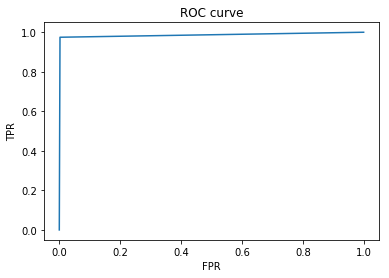

(290721,)
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
Precision is 0.929902835613722
Accuracy: 0.9319072237643652
F1 score: 0.9636783971230414
Recall Score: 1.0
Confusion Matrix:

262612 19796
0 8313


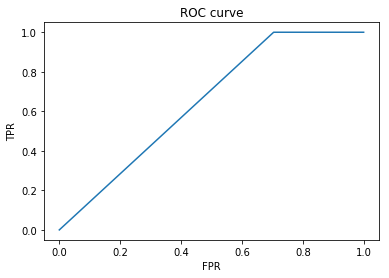

(290721,)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Precision is 0.99447646493756
Accuracy: 0.9890685571389751
F1 score: 0.9939460209088969
Recall Score: 0.9934161424458897
Confusion Matrix:

260883 1449
1729 26660


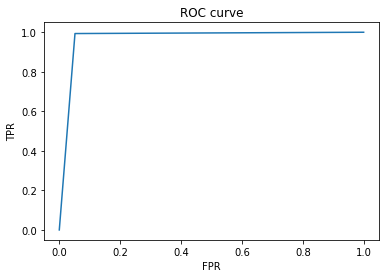

(290721,)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Precision is 0.9658473965306693
Accuracy: 0.9679624106961657
F1 score: 0.9825737165095045
Recall Score: 0.9998895709259288
Confusion Matrix:

262583 9285
29 18824


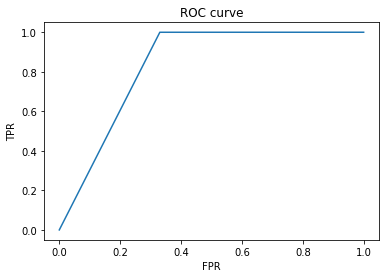

(290721,)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Precision is 1.0
Accuracy: 1.0
F1 score: 1.0
Recall Score: 1.0
Confusion Matrix:

262612 0
0 28109


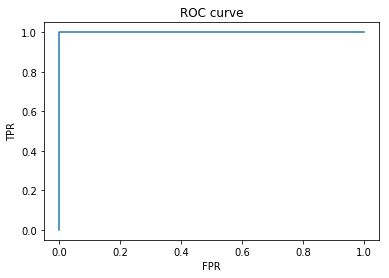

(290721,)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Precision is 1.0
Accuracy: 1.0
F1 score: 1.0
Recall Score: 1.0
Confusion Matrix:

262612 0
0 28109


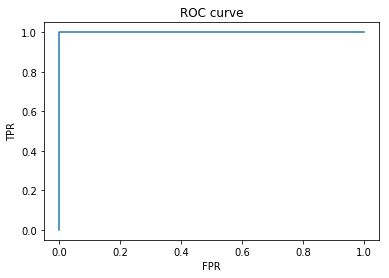

(290721,)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Precision is 1.0
Accuracy: 1.0
F1 score: 1.0
Recall Score: 1.0
Confusion Matrix:

262612 0
0 28109


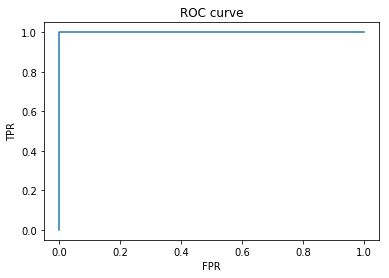

(290721,)
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Precision is 1.0
Accuracy: 1.0
F1 score: 1.0
Recall Score: 1.0
Confusion Matrix:

262612 0
0 28109


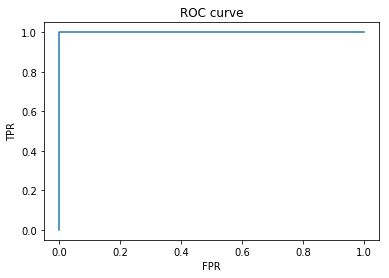

In [44]:
models = [GaussianNB,LinearDiscriminantAnalysis,LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier,GradientBoostingClassifier]

#models = [KMeans,,SVC]


for model in models:
    # run model
    model = model()
    run_model(X_train, y_train,X_test,y_test,model)